<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [77]:
import pandas as pd
import numpy as np
import cv2    
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
plt.style.use('ggplot')
import tensorflow as tf
print(tf.__version__)

2.2.0


In [67]:
main_folder='/content/drive/My Drive/Final_Project/'
images_folder=main_folder + 'face/'
EXAMPLE_PIC = images_folder + '000001.jpg'
IMG_WIDTH=178
IMG_HEIGHT=218
BATCH_SIZE = 16
NUM_EPOCHS = 20
df_attr=pd.read_excel(main_folder+'gender_dataset.xlsx',)

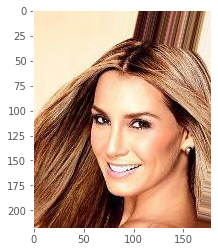

In [5]:
img=load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)

In [6]:
train_datagen = ImageDataGenerator(
  #preprocessing_function=preprocess_input,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True
)


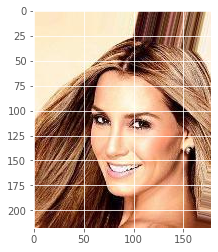

In [68]:
plt.imshow(load_resize(EXAMPLE_PIC))

In [157]:
faceDetect=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def load_resize_extractface(fname):
    image=cv2.imread(fname)
    image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces=faceDetect.detectMultiScale(
          image_gray,
          scaleFactor=1.3,
          minNeighbors=3,
          minSize=(10,10)
    )
    for (x, y, w, h) in faces:
      #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
       roi_color = (image[y:y + h, x:x + w])
       return roi_color


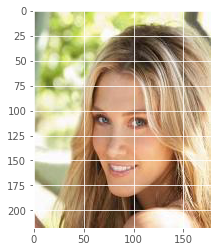

In [174]:
plt.imshow(load_img(images_folder + '000982.jpg'))

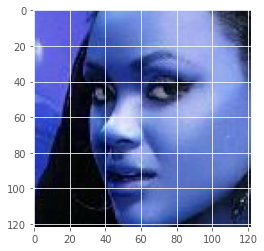

In [186]:
plt.imshow(load_resize_extractface(images_folder + '000059.jpg'))

In [129]:
arr_image=[]
for fname in df_attr['Id_image']:
   arr_image.append(load_resize_extractface(images_folder + fname))

In [150]:
arr_image[3]

In [138]:
x_train=np.array(arr_image[0:1001])
y_train=df_attr['Male'][0:1001]
x_valid=np.array(arr_image[1000:1501])
y_valid=df_attr['Male'][1000:1501]
x_test=np.array(arr_image[1500:2000])
y_test=df_attr['Male'][1500:2000]